# Option Pricing model

In [1]:
# This program calculates the fair value option price for put and call options using the Black-Scholes model.
# The user can update inputs for the required pricing parameters in the next cell.
# 20211107: expanded input for underlying prices from a single value to a list
# 20211107.02: added visual for the payoff profile of the first call option at expiry

import math
from scipy.stats import norm
import matplotlib.pyplot as plt

# Inputs

In [2]:
S = [10.0, 11.5, 12]   # stock price
X = 9.0    # exercise price
r = 0.02   # interest rate
t = 0.5    # time to expiry, in years
vol = 0.3  # volatility, annualized 
premium = 0.35 # premium paid or received (for first call option)
# X = [9.0, 9.0, 10.5]    # exercise price
# r = [0.02, 0.02, 0.02]   # interest rate
# t = [0.5, 0.5, 1.0]    # time to expiry, in years
# vol = [0.3, 0.3, 0.3]  # volatility, annualized 

# Calculations

In [3]:
call_values = []
put_values = []

for i in range(len(S)):
    d1 = (math.log(S[i]/X) + 0.5*(vol*vol)*t) / (vol*math.sqrt(t))
    d2 = d1 - vol*math.sqrt(t)
    Nd1=norm.cdf(d1)
    Nd2=norm.cdf(d2)
    # S*Nd1 - X*Nd2
    call = math.exp(-r*t)*(S[i]*Nd1 - X*Nd2)
    # print('Call value is: ' + str(call))
    call_values.append(call)
    put = math.exp(-r*t)*(X*(1-Nd2)-S[i]*(1-Nd1))
    # print('Put value is: ' + str(put))
    put_values.append(put)
print('Call values: ')
print(call_values)
print ('\n ')
print('Put values: ')
print(put_values)

Call values: 
[1.385063213008336, 2.6058598863759115, 3.0578855128000986]

 
Put values: 
[0.39501337925916885, 0.13073530200299102, 0.0877360115525945]


# Visualization

In [4]:
# Call value at expiry
# input: premiums paid/received
# Profit_Loss = y = S - X - c
# x = Underlying price = S     -5, -4, -3, -2, -1, -.75, , -.5, -.25, -.1, 0, +.1, +.25....
S_increments = [-5, -4, -3, -2, -1, -.75, -.5, -.25, -.1, 0, +.1, +.25, +.5, +.75, +1, +2, +3, +4, +5]
call_profit = []
S_T = []
# underlying price at option expiry, time T
for i in range(len(S_increments)):
    S_T.append(S[0]+S_increments[i])
    y = max(S_T[i]-X,0) - premium
    call_profit.append(y)

Text(0.5, 0, 'Underlying price at option expiry (time=T)')

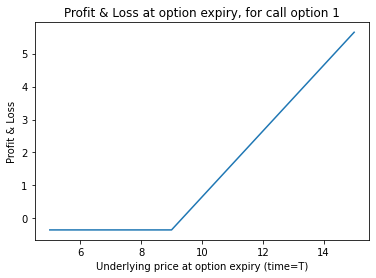

In [5]:
plt.plot(S_T, call_profit)
plt.title('Profit & Loss at option expiry, for call option 1')
plt.ylabel('Profit & Loss')
plt.xlabel('Underlying price at option expiry (time=T)')